In [1]:
import os
import pandas as pd

In [2]:
mobsuite= pd.read_csv("/home/haley/Desktop/Complete_Assemblies_Plasmid/12122022_All_20_Isolates_All_Assemblies_mobsuite_results_processed_sorted_withPP_analysisfriendly.csv")

In [3]:
mobsuite.head()

,Isolate_Pathname,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing,sample_id,num_contigs,size,gc,...,mash_neighbor_identification,primary_cluster_id,secondary_cluster_id,predicted_host_range_overall_rank,predicted_host_range_overall_name,observed_host_range_ncbi_rank,observed_host_range_ncbi_name,reported_host_range_lit_rank,reported_host_range_lit_name,associated_pmid(s)
0,EC-A-0012-C5-H-CuP-CeN,HLF,Hybrid,Ligation,Filtered,Pilon,AB443,1,5569,46.794757,...,Escherichia coli,AB443,AK226,multi-phylla,"Actinobacteria,Bacteroidetes,Firmicutes,Proteo...",multi-phylla,"Actinobacteria,Bacteroidetes,Firmicutes,Proteo...",genus,Escherichia,6263753; 17122402; 26802429
1,EC-A-0012-C5-H-CuP-CeN,HLF,Hybrid,Ligation,Filtered,Pilon,AC748,1,2089,47.199617,...,Escherichia coli,AC748,AM073,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
2,EC-A-0012-C5-H-CuP-CeN,HLF,Hybrid,Ligation,Filtered,Pilon,AA329,1,93702,52.034108,...,Escherichia coli O26:H11 str. 11368,AA329,-,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
3,EC-A-0012-C5-H-CuP-CeN,HLUF,Hybrid,Ligation,Unfiltered,Pilon,AA329,1,93702,52.034108,...,Escherichia coli O26:H11 str. 11368,AA329,-,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
4,EC-A-0012-C5-H-CuP-CeN,HLUF,Hybrid,Ligation,Unfiltered,Pilon,AB443,1,5569,46.794757,...,Escherichia coli,AB443,AK226,multi-phylla,"Actinobacteria,Bacteroidetes,Firmicutes,Proteo...",multi-phylla,"Actinobacteria,Bacteroidetes,Firmicutes,Proteo...",genus,Escherichia,6263753; 17122402; 26802429


In [4]:
new =mobsuite['Isolate_Pathname'].str.split('-', expand=True)
mobsuite["Isolates1"]= new[2]
mobsuite["Isolates2"]=new[3]

In [5]:
cols = ['Isolates1', 'Isolates2']
mobsuite['Isolate'] = mobsuite[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [6]:
mobsuite1 = mobsuite.drop(['Isolate_Pathname', 'Isolates1', 'Isolates2'], axis = 1)

In [7]:
cols = ['Isolate', 'Category', 'Assembly_Type', 'Sequencing_Kit', 'Filtering', 'Polishing']
mobsuite1['Isolate_Information'] = mobsuite1[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [8]:
plasmidsize = mobsuite1.groupby('Isolate_Information')['size'].mean()

In [9]:
df = pd.DataFrame(data=plasmidsize)

In [10]:
df1 = df.reset_index()

In [11]:
new =df1["Isolate_Information"].str.split('-', expand=True)
df1["Isolates1"]= new[0]
df1["Isolates2"]=new[1]
df1["Category"]=new[2]
df1['Assembly_Type']=new[3]
df1['Sequencing_Kit']=new[4]
df1['Filtering']=new[5]
df1['Polishing']=new[6]

In [12]:
df1

,Isolate_Information,size,Isolates1,Isolates2,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing
0,0012-2L1-HLF-Hybrid-Ligation-Filtered-Pilon,146304.000000,0012,2L1,HLF,Hybrid,Ligation,Filtered,Pilon
1,0012-2L1-HLUF-Hybrid-Ligation-Unfiltered-Pilon,133408.000000,0012,2L1,HLUF,Hybrid,Ligation,Unfiltered,Pilon
2,0012-2L1-HRF-Hybrid-Ligation-Filtered-Pilon,154828.000000,0012,2L1,HRF,Hybrid,Ligation,Filtered,Pilon
3,0012-2L1-HRUF-Hybrid-Ligation-Unfiltered-Pilon,133389.000000,0012,2L1,HRUF,Hybrid,Ligation,Unfiltered,Pilon
4,0012-2L1-LLF-Long_Read-Ligation-Filtered-Unpol...,146005.000000,0012,2L1,LLF,Long_Read,Ligation,Filtered,Unpolished
...,...,...,...,...,...,...,...,...,...
315,9619-3S1-LRFMP-Long_Read -Rapid-Filtered-Medak...,126240.666667,9619,3S1,LRFMP,Long_Read,Rapid,Filtered,Medaka_Pilon
316,9619-3S1-LRUF-Long_Read -Rapid-Unfiltered-Unpo...,95174.500000,9619,3S1,LRUF,Long_Read,Rapid,Unfiltered,Unpolished
317,9619-3S1-LRUFM-Long_Read -Rapid-Unfiltered-Medaka,95407.000000,9619,3S1,LRUFM,Long_Read,Rapid,Unfiltered,Medaka
318,9619-3S1-LRUFMP-Long_Read -Rapid-Unfiltered-Me...,95325.000000,9619,3S1,LRUFMP,Long_Read,Rapid,Unfiltered,Medaka_Pilon


In [13]:
cols = ['Isolates1', 'Isolates2']
df1['Isolate'] = df1[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [14]:
df2 = df1.drop(['Isolate_Information', 'Isolates1', 'Isolates2'], axis = 1)

In [15]:
df2.to_csv("12122022_EcoliPlasmidDetection_plasmidsizeforstats_all_info.csv")

In [16]:
df2.head()

,size,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing,Isolate
0,146304.0,HLF,Hybrid,Ligation,Filtered,Pilon,0012-2L1
1,133408.0,HLUF,Hybrid,Ligation,Unfiltered,Pilon,0012-2L1
2,154828.0,HRF,Hybrid,Ligation,Filtered,Pilon,0012-2L1
3,133389.0,HRUF,Hybrid,Ligation,Unfiltered,Pilon,0012-2L1
4,146005.0,LLF,Long_Read,Ligation,Filtered,Unpolished,0012-2L1


In [17]:
#do a one way ANOVA based on column Assembly_Type2 (Hybrid, Long_Read, Plasmid_Prep)
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('size ~ C(Assembly_Type)', data=df2).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Assembly_Type),1.005270e-19


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Hybrid vs. Long_Read: t-test independent samples, P_val:8.996e-01 t=-1.263e-01
Long_Read vs. PP: t-test independent samples, P_val:5.124e-12 t=7.396e+00
Hybrid vs. PP: t-test independent samples, P_val:4.414e-10 t=6.992e+00


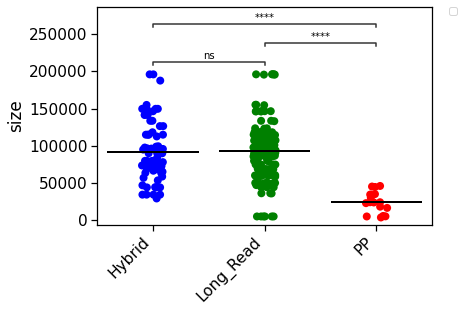

In [18]:
#generate a figure to represent the data from the ANOVA and the ttest results for the above
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("Hybrid", "Long_Read"), ("Hybrid","PP"),("Long_Read", "PP"))
states_subcat =["Hybrid", "Long_Read", "PP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': df2,'x': 'Assembly_Type', 'y': 'size', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Assembly_Type", y="size", data=df2, size=8, order=states_subcat,palette=['blue','green','red'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
g = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Assembly_Type",
            y="size",
            data=df2,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
g.set(xlabel=None)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("12122022_EcoliPlasmidDetection_plasmidsize.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Ligation vs. Rapid: t-test independent samples, P_val:9.259e-01 t=9.313e-02
Rapid vs. PP: t-test independent samples, P_val:2.845e-17 t=9.480e+00
Ligation vs. PP: t-test independent samples, P_val:2.815e-10 t=6.712e+00


(<AxesSubplot:ylabel='size'>,
  <statannotations.Annotation.Annotation at 0x7fe870a69dc0>])

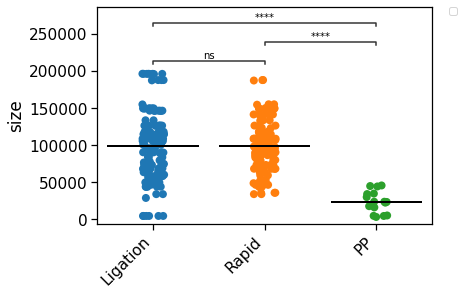

In [19]:
#Look at differences in Sequencing Condition to see the same size differences between assemblies and plasmid extractions and no difference between assemblies using Ligation and Rapid kit
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("Ligation", "Rapid"), ("Ligation","PP"),("Rapid", "PP"))
states_subcat =["Ligation", "Rapid", "PP"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': df2,'x': 'Sequencing_Kit', 'y': 'size', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Sequencing_Kit", y="size", data=df2, size=8, order=states_subcat)
plt.xticks(rotation=45, ha="right")


# plot the mean line
g = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Sequencing_Kit",
            y="size",
            data=df2,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
g.set(xlabel=None)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Filtered vs. Unfiltered: t-test independent samples, P_val:2.974e-01 t=1.044e+00
Unfiltered vs. Plasmid: t-test independent samples, P_val:9.929e-12 t=7.321e+00
Filtered vs. Plasmid: t-test independent samples, P_val:7.005e-14 t=8.185e+00


(<AxesSubplot:ylabel='size'>,
  <statannotations.Annotation.Annotation at 0x7fe8709b5f10>])

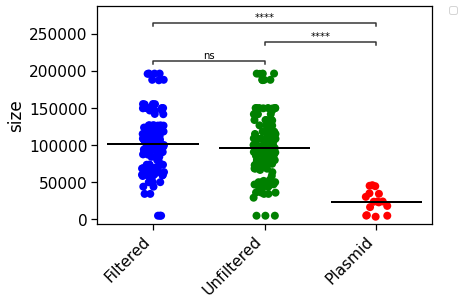

In [20]:

#figure to show differences in plasmid size based on Assembly Condition (long reads filtered or unfiltered) showing only difference between assemblies and plasmid extractions 
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("Filtered", "Unfiltered"), ("Filtered", "Plasmid"), ("Unfiltered", "Plasmid"))
states_subcat =["Filtered", "Unfiltered", "Plasmid"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': df2,'x': 'Filtering', 'y': 'size', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Filtering", y="size", data=df2, size=8, order=states_subcat, palette=['blue','green','red'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
g = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Filtering",
            y="size",
            data=df2,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
g.set(xlabel=None)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()



p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pilon vs. Unpolished: t-test independent samples, P_val:1.453e-01 t=-1.464e+00
Unpolished vs. Medaka: t-test independent samples, P_val:9.780e-01 t=-2.761e-02
Medaka vs. Medaka_Pilon: t-test independent samples, P_val:9.571e-01 t=5.387e-02
Medaka_Pilon vs. Plasmid: t-test independent samples, P_val:6.917e-12 t=7.888e+00
Pilon vs. Medaka: t-test independent samples, P_val:1.364e-01 t=-1.497e+00
Unpolished vs. Medaka_Pilon: t-test independent samples, P_val:9.793e-01 t=2.605e-02
Medaka vs. Plasmid: t-test independent samples, P_val:5.980e-12 t=7.919e+00
Pilon vs. Medaka_Pilon: t-test independent samples, P_val:1.509e-01 t=-1.444e+00
Unpolished vs. Plasmid: t-test independent samples, P_val:7.231e-12 t=7.892e+00
Pilon vs. Plasmid: t-test independent samples, P_val:4.414e-10 t=6.992e+00


(<AxesSubplot:ylabel='size'>,
  <statannotations.Annotation.Annotation at 0x7fe870821640>])

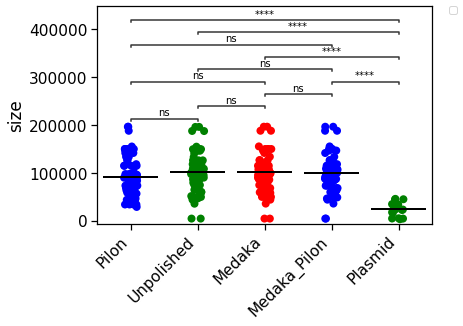

In [21]:

#figure to show differences in plasmid size based on Assembly Condition (long reads filtered or unfiltered) showing only difference between assemblies and plasmid extractions 
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("Pilon", "Unpolished"), ("Pilon", "Medaka"), ("Pilon", "Medaka_Pilon"), ("Pilon", "Plasmid"), ("Unpolished", "Medaka"), ("Unpolished", "Medaka_Pilon"), ("Unpolished", "Plasmid"), ("Medaka", "Medaka_Pilon"), ("Medaka", "Plasmid"), ("Medaka_Pilon", "Plasmid"))
states_subcat =["Pilon", "Unpolished", "Medaka", "Medaka_Pilon", "Plasmid"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': df2,'x': 'Polishing', 'y': 'size', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Polishing", y="size", data=df2, size=8, order=states_subcat, palette=['blue','green','red'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
g = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Polishing",
            y="size",
            data=df2,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
g.set(xlabel=None)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unpolished vs. Medaka: t-test independent samples, P_val:9.780e-01 t=-2.761e-02
Medaka vs. Medaka_Pilon: t-test independent samples, P_val:9.571e-01 t=5.387e-02
Unpolished vs. Medaka_Pilon: t-test independent samples, P_val:9.793e-01 t=2.605e-02


(<AxesSubplot:ylabel='size'>,
  <statannotations.Annotation.Annotation at 0x7fe870888fa0>])

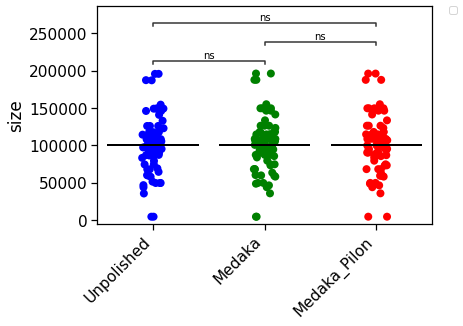

In [22]:

#figure to show differences in plasmid size based on Assembly Condition (long reads filtered or unfiltered) showing only difference between assemblies and plasmid extractions 
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

pairs1=(("Unpolished", "Medaka"), ("Unpolished", "Medaka_Pilon"), ("Medaka", "Medaka_Pilon"))
states_subcat =["Unpolished", "Medaka", "Medaka_Pilon"]
state_palette = "colorblind"
"LRUF+PCCUF"
with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': df2,'x': 'Polishing', 'y': 'size', "order": states_subcat, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Polishing", y="size", data=df2, size=8, order=states_subcat, palette=['blue','green','red'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
g = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Polishing",
            y="size",
            data=df2,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)
g.set(xlabel=None)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs1, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()